# Estadísticas de comparación entre el gobierno de EPN y AMLO
    * Comparación de iniciativas aprobadas
    * Comparación de iniciativas desechadas
    * Por ley que modifica
    * Por partido

Nombres: Anairam Mar, Francisco Calvillo, Luciano Montes, Santiago Delgado y Bruno Molina
    

## Definición de función que nos permite ingresar el token del API Legislativo

In [1]:
def id_token():
  id = input("Escribe el token del API Legislativo ")

  f = open('./conf/token_api.txt','w')
  f.write(id)
  f.close()

# Carga de información a MongoDB

In [2]:
id_token()

Escribe el token del API Legislativo eyJraWQiOiIwbVhrbzR4bDBtOTFUOUMxaFNHbCtsZmJCY3VMdVVFQjFmQWxacUtMMFVNPSIsImFsZyI6IlJTMjU2In0.eyJhdF9oYXNoIjoiT3d3dXNyLUszQktDNlRDSU9LeV9SQSIsInN1YiI6IjhlMzBjMmY4LTNkMWItNDRmZS04ZDcwLTFlY2JkYWU2YTA5MCIsImF1ZCI6IjUxMWN1YTRsdTRrYW9zdW9qZmo5NDhmOTB0IiwiZW1haWxfdmVyaWZpZWQiOmZhbHNlLCJldmVudF9pZCI6IjRiYTRmN2RhLTFlNTAtNDNiZS1hY2Q4LTNjZWZiNDgzOGUwZSIsInRva2VuX3VzZSI6ImlkIiwiYXV0aF90aW1lIjoxNjM5MDgyMTkxLCJpc3MiOiJodHRwczpcL1wvY29nbml0by1pZHAudXMtZWFzdC0xLmFtYXpvbmF3cy5jb21cL3VzLWVhc3QtMV9kUjNBWjhPMm8iLCJjb2duaXRvOnVzZXJuYW1lIjoiOGUzMGMyZjgtM2QxYi00NGZlLThkNzAtMWVjYmRhZTZhMDkwIiwiZXhwIjoxNjM5MDk2NTkxLCJpYXQiOjE2MzkwODIxOTEsImVtYWlsIjoiYm1vbGluYXpAaXRhbS5teCJ9.OBKcxCviqVHI3grmsUj88PNuPtcFBoIJ95ZIqy3zGdqNzk9tWnbGV9o4mgUI9cauW7dNKYmHCGIqQv-Ij6mndJUBm3nZLWdTWld4DjORFSqqc1_9-7zrUBjzOjxBD8cNxEBE5AkbXk8x6HMJx0iLOG0Mv7o-Ja-dkEPx0jKphc30tN4_evtEba569sUduEmqqGM7OIiiQMsnJVkHIEhEX3TxGcIpqIgEIPl8n8Iun8d_JQeJ6nMldMN73Asvg5Lgwg1yYRlzWYjNrMI5AxDTRd4io0iGmvivBZ0bilnBxKmAe1osZg

In [3]:
%run -i "./conf/Carga_info.py"

# Librerias importadas

In [4]:
import requests
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
pd.set_option("max_rows", None)
import numpy as np
import seaborn as sns
import pymongo
from pymongo import MongoClient
import datetime as dt
from datetime import datetime as dtt
from datetime import date
import matplotlib.pyplot as plt

Credenciales BD Apilegislativo - Table: iniciativasaprobadas

In [2]:
with open('./conf/local/credentials_mongodb.txt') as f:
    var = f.read()
client = var

In [6]:
client_cred = client

In [7]:
client = MongoClient()

client = MongoClient(client_cred) 

mydatabase = client['apilegislativo']

mycollection=mydatabase['iniciativasaprobadas']

Credenciales BD Apilegislativo - Table: iniciativasrechazadas

In [8]:
client_2=MongoClient()

client_2 = MongoClient(client_cred) 

mydatabase_2 = client['apilegislativo']

mycollection_2=mydatabase_2['iniciativasdesechadas']

# Primeras consultas

Cantidad de iniciativas aprobadas en el sexenio de Peña Nieto (01/DIC/2012-30/NOV/2018)

In [9]:
agg_result_iniciativas_EPN= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_aprobadas"}
])
for i in agg_result_iniciativas_EPN:
    print (i)
    agg_result_iniciativas_EPN = i

{'iniciativas_aprobadas': 1568}


Cantidad de iniciativas rechazadas en el sexenio de Peña Nieto (01/DIC/2012-30/NOV/2018)

In [10]:
agg_result_desechadas_EPN= mycollection_2.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_desechadas"}
])
for i in agg_result_desechadas_EPN:
    print (i)
    agg_result_desechadas_EPN = i

{'iniciativas_desechadas': 7425}


Cantidad de iniciativas aprobadas en el sexenio de Andrés Manuel López Obrador (01/DIC/2018-30/11/2024)

In [11]:
agg_result_iniciativas_AMLO= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_aprobadas"}
])
for i in agg_result_iniciativas_AMLO:
    print (i)
    agg_result_iniciativas_AMLO = i

{'iniciativas_aprobadas': 1544}


Cantidad de iniciativas desechadas en el sexenio de Andrés Manuel López Obrador (01/DIC/2018-30/11/2024)

In [12]:
agg_result_desechadas_AMLO= mycollection_2.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_desechadas"}
])
for i in agg_result_desechadas_AMLO:
    print (i)
    agg_result_desechadas_AMLO = i

{'iniciativas_desechadas': 615}


# DataFrame comparativos

In [13]:
var_1 = agg_result_iniciativas_EPN['iniciativas_aprobadas']
var_2 = agg_result_iniciativas_AMLO['iniciativas_aprobadas']

d = {'EPN': [var_1], 'AMLO': [var_2]}

data_frame_iniciativas_aprobadas = pd.DataFrame(d)
df_ini_aux = data_frame_iniciativas_aprobadas.melt(value_vars=['EPN','AMLO'],var_name='Presidente',value_name='aprobadas')

var_1 = agg_result_desechadas_EPN['iniciativas_desechadas']
var_2 = agg_result_desechadas_AMLO['iniciativas_desechadas']

e = {'EPN': [var_1], 'AMLO': [var_2]}

data_frame_iniciativas_desechadas = pd.DataFrame(e)
df_ini_desechadas = data_frame_iniciativas_desechadas.melt(value_vars=['EPN','AMLO'],var_name='Presidente',value_name='desechadas')
array_aux = df_ini_desechadas['desechadas'].values
df_ini_aux['desechadas'] = array_aux
df_ini_apro_des = df_ini_aux.melt(id_vars='Presidente',value_vars=['aprobadas','desechadas'],var_name='Iniciativas',value_name='Cantidad')
df_ini_apro_des

Presidente Iniciativas  Cantidad
0        EPN   aprobadas      1568
1       AMLO   aprobadas      1544
2        EPN  desechadas      7425
3       AMLO  desechadas       615

Cantidad de iniciativas en los cuatro trimestre del 2012-2013 de EPN

In [14]:
lista_year = [[2012,2013],[2013,2013],[2013,2013],[2013,2013]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2013 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2013= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_EPN_2013:
        trimestres_EPN_2013.append(i)
print (trimestres_EPN_2013)  

[{'iniciativas': 21}, {'iniciativas': 75}, {'iniciativas': 14}, {'iniciativas': 159}]


In [15]:
columnas = ['trimestre_1_12-13','trimestre_2_12-13','trimestre_3_12-13','trimestre_4_12-13']

#Comentado para cuando esten los datos de EPN
f = {}

for i in range(len(trimestres_EPN_2013)):
  var_aux = trimestres_EPN_2013[i]
  f[columnas[i]] = [var_aux['iniciativas']]

#f = {'trimestre_1_12-13':[0],'trimestre_2_12-13':[0],'trimestre_3_12-13':[0],'trimestre_4_12-13':[0]}

data_frame_trimestres_EPN_2013 = pd.DataFrame(f)
data_frame_trimestres_EPN_2013

trimestre_1_12-13  trimestre_2_12-13  trimestre_3_12-13  trimestre_4_12-13
0                 21                 75                 14                159

Cantidad de iniciativas en los cuatro trimestre del 2013-2014 de EPN

In [16]:
lista_year = [[2013,2014],[2014,2014],[2014,2014],[2014,2014]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2014 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2014= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_EPN_2014:
        trimestres_EPN_2014.append(i)
print (trimestres_EPN_2014) 

[{'iniciativas': 55}, {'iniciativas': 42}, {'iniciativas': 12}, {'iniciativas': 68}]


In [17]:
columnas = ['trimestre_1_13-14','trimestre_2_13-14','trimestre_3_13-14','trimestre_4_13-14']

#Comentado para cuando esten los datos de EPN
f = {}

for i in range(len(trimestres_EPN_2014)):
  var_aux = trimestres_EPN_2014[i]
  f[columnas[i]] = [var_aux['iniciativas']]

#f = {'trimestre_1_13-14':[0],'trimestre_2_13-14':[0],'trimestre_3_13-14':[0],'trimestre_4_13-14':[0]}

data_frame_trimestres_EPN_2014 = pd.DataFrame(f)
data_frame_trimestres_EPN_2014

trimestre_1_13-14  trimestre_2_13-14  trimestre_3_13-14  trimestre_4_13-14
0                 55                 42                 12                 68

Cantidad de iniciativas en los cuatro trimestre del 2015 de EPN

In [18]:
lista_year = [[2014,2015],[2015,2015],[2015,2015],[2015,2015]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2015 = []
count = 0

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2015= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    count += 1
    for i in primer_trimestre_EPN_2015:
        trimestres_EPN_2015.append(i)
        print (i)
        print(count)
print (trimestres_EPN_2015) 

{'iniciativas': 54}
1
{'iniciativas': 55}
2
{'iniciativas': 13}
4
[{'iniciativas': 54}, {'iniciativas': 55}, {'iniciativas': 13}]


In [19]:
columnas = ['trimestre_1_14-15','trimestre_2_14-15','trimestre_4_14-15']

#Comentado para cuando esten los datos de EPN
f = {}

for i in range(len(trimestres_EPN_2015)):
  var_aux = trimestres_EPN_2015[i]
  f[columnas[i]] = [var_aux['iniciativas']]

#f = {'trimestre_1_14-15':[0],'trimestre_2_14-15':[0],'trimestre_3_14-15':[0],'trimestre_4_14-15':[0]}

f
data_frame_trimestres_EPN_2015 = pd.DataFrame(f)
data_frame_trimestres_EPN_2015

trimestre_1_14-15  trimestre_2_14-15  trimestre_4_14-15
0                 54                 55                 13

Cantidad de iniciativas en los cuatro trimestres del 2019 de AMLO

In [20]:
lista_year = [[2018,2019],[2019,2019],[2019,2019],[2019,2019]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_AMLO_2019 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2019= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2019:
        trimestres_AMLO_2019.append(i)
print (trimestres_AMLO_2019)  

[{'iniciativas': 30}, {'iniciativas': 144}, {'iniciativas': 12}, {'iniciativas': 298}]


In [21]:
columnas = ['trimestre_1_18-19','trimestre_2_18-19','trimestre_3_18-19','trimestre_4_18-19']
f = {}

for i in range(len(trimestres_AMLO_2019)):
  var_aux = trimestres_AMLO_2019[i]
  f[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2019 = pd.DataFrame(f)
data_frame_trimestres_AMLO_2019


trimestre_1_18-19  trimestre_2_18-19  trimestre_3_18-19  trimestre_4_18-19
0                 30                144                 12                298

Cantidad de iniciativas en los cuatro trimestres del 2020 de AMLO

In [22]:
lista_year = [[2019,2020],[2020,2020],[2020,2020],[2020,2020]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [29,31,31,30]
trimestres_AMLO_2020 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2020= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2020:
        trimestres_AMLO_2020.append(i)
print (trimestres_AMLO_2020)

[{'iniciativas': 100}, {'iniciativas': 91}, {'iniciativas': 33}, {'iniciativas': 338}]


In [23]:
columnas = ['trimestre_1_19-20','trimestre_2_19-20','trimestre_3_19-20','trimestre_4_19-20']
t = {}

for i in range(len(trimestres_AMLO_2020)):
  var_aux = trimestres_AMLO_2020[i]
  t[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2020 = pd.DataFrame(t)
data_frame_trimestres_AMLO_2020

trimestre_1_19-20  trimestre_2_19-20  trimestre_3_19-20  trimestre_4_19-20
0                100                 91                 33                338

Cantidad de iniciativas en los cuatro trimestres del 2021 de EPN

In [24]:
lista_year = [[2020,2021],[2021,2021],[2021,2021],[2021,2021]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_AMLO_2021 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2021 = mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2021:
        trimestres_AMLO_2021.append(i)
print (trimestres_AMLO_2021)

[{'iniciativas': 193}, {'iniciativas': 304}, {'iniciativas': 1}]


In [25]:
columnas = ['trimestre_1_20-21','trimestre_2_20-21','trimestre_3_20-21']
r = {}

for i in range(len(trimestres_AMLO_2021)):
  var_aux = trimestres_AMLO_2021[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2021 = pd.DataFrame(r)
data_frame_trimestres_AMLO_2021

trimestre_1_20-21  trimestre_2_20-21  trimestre_3_20-21
0                193                304                  1

Credenciales BD Apilegislativo - Table: Iniciativas por partido

In [26]:
client_3 = MongoClient()

client_3 = MongoClient(client_cred) 

mydatabase_3 = client['apilegislativo']

Cantidad de iniciativas aprobadas por partido en el sexenio de EPN

In [27]:
lista_partidos = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
iniciativas_por_partido_aprobadas_EPN = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_EPN= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"status":"Aprobada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_EPN:
        iniciativas_por_partido_aprobadas_EPN.append(i)
print (iniciativas_por_partido_aprobadas_EPN)

[{'iniciativas': 481}, {'iniciativas': 154}, {'iniciativas': 234}, {'iniciativas': 226}, {'iniciativas': 99}, {'iniciativas': 157}, {'iniciativas': 626}, {'iniciativas': 88}, {'iniciativas': 337}]


In [28]:
columnas = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
r = {}

for i in range(len(iniciativas_por_partido_aprobadas_EPN)):
  var_aux = iniciativas_por_partido_aprobadas_EPN[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_aprobadas_EPN = pd.DataFrame(r)
df_ini_aux_EPN = data_frame_iniciativas_por_partido_aprobadas_EPN.melt(value_vars=['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD'],var_name="Partido",\
                                                                    value_name='Cantidad')
df_ini_aux_EPN['Presidente'] = ['EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN']
df_ini_aux_EPN

Partido  Cantidad Presidente
0                   PAN       481        EPN
1  Movimiento_ciudadano       154        EPN
2                  PVEM       234        EPN
3                MORENA       226        EPN
4                   PES        99        EPN
5   Partido_del_trabajo       157        EPN
6                   PRI       626        EPN
7                    SP        88        EPN
8                   PRD       337        EPN

Cantidad de iniciativas desechadas por partido en el sexenio de EPN

In [29]:
lista_partidos = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
iniciativas_por_partido_desechadas_EPN = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_EPN= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"status":"Desechada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_EPN:
        iniciativas_por_partido_desechadas_EPN.append(i)
print (iniciativas_por_partido_desechadas_EPN)

[{'iniciativas': 1705}, {'iniciativas': 803}, {'iniciativas': 908}, {'iniciativas': 978}, {'iniciativas': 490}, {'iniciativas': 241}, {'iniciativas': 1963}, {'iniciativas': 400}, {'iniciativas': 1341}]


In [30]:
columnas = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
# Comentado hasta obtener más información del sexenio de EPN
r = {}

for i in range(len(iniciativas_por_partido_desechadas_EPN)):
  var_aux = iniciativas_por_partido_desechadas_EPN[i]
  r[columnas[i]] = [var_aux['iniciativas']]
#dic = iniciativas_por_partido_desechadas_EPN[0][1]

#r = {'PAN':[64],'PVEM':[8],'Partido_del_trabajo':[67],'PRI':[84],'SP' : [3968], 'PRD':[23]}

data_frame_iniciativas_por_partido_desechadas_EPN = pd.DataFrame(r)
df_ini_aux_EPN_des = data_frame_iniciativas_por_partido_desechadas_EPN.melt(value_vars=['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD'],var_name="Partido",\
                                                                    value_name='Cantidad')
df_ini_aux_EPN_des['Presidente'] = ['EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN']
df_ini_aux_EPN_des

Partido  Cantidad Presidente
0                   PAN      1705        EPN
1  Movimiento_ciudadano       803        EPN
2                  PVEM       908        EPN
3                MORENA       978        EPN
4                   PES       490        EPN
5   Partido_del_trabajo       241        EPN
6                   PRI      1963        EPN
7                    SP       400        EPN
8                   PRD      1341        EPN

Cantidad de iniciativas aprobadas por partido en el sexenio de AMLO

In [31]:
lista_partidos = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
iniciativas_por_partido_aprobadas_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Aprobada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_aprobadas_AMLO.append(i)
print (iniciativas_por_partido_aprobadas_AMLO)

[{'iniciativas': 347}, {'iniciativas': 193}, {'iniciativas': 140}, {'iniciativas': 590}, {'iniciativas': 131}, {'iniciativas': 52}, {'iniciativas': 244}, {'iniciativas': 154}, {'iniciativas': 113}]


In [32]:
columnas = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
r = {}

for i in range(len(iniciativas_por_partido_aprobadas_AMLO)):
  var_aux = iniciativas_por_partido_aprobadas_AMLO[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_aprobadas_AMLO = pd.DataFrame(r)
df_ini_aux_AMLO = data_frame_iniciativas_por_partido_aprobadas_AMLO.melt(value_vars=['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD'],var_name="Partido",\
                                                                    value_name='Cantidad')
df_ini_aux_AMLO['Presidente'] = ['AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO']
df_ini_aux_AMLO

Partido  Cantidad Presidente
0                   PAN       347       AMLO
1  Movimiento_ciudadano       193       AMLO
2                  PVEM       140       AMLO
3                MORENA       590       AMLO
4                   PES       131       AMLO
5   Partido_del_trabajo        52       AMLO
6                   PRI       244       AMLO
7                    SP       154       AMLO
8                   PRD       113       AMLO

In [33]:
df_ini_par_EPN_AMLO = df_ini_aux_AMLO.join(df_ini_aux_EPN, lsuffix='_caller', rsuffix='_other')
df_ini_par_EPN_AMLO.drop(['Partido_other'], axis=1, inplace=True)
df_ini_par_EPN_AMLO = df_ini_par_EPN_AMLO.melt(id_vars='Partido_caller',value_vars=['Cantidad_caller','Cantidad_other'],var_name='Presidente',value_name='Cantidad_aprobadas')
df_ini_par_EPN_AMLO.drop(['Presidente'], axis=1, inplace=True)
df_ini_par_EPN_AMLO['Presidente'] = ['AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN']
df_ini_par_EPN_AMLO.rename(columns={"Partido_caller": "Partido"},inplace=True)
df_ini_par_EPN_AMLO

Partido  Cantidad_aprobadas Presidente
0                    PAN                 347       AMLO
1   Movimiento_ciudadano                 193       AMLO
2                   PVEM                 140       AMLO
3                 MORENA                 590       AMLO
4                    PES                 131       AMLO
5    Partido_del_trabajo                  52       AMLO
6                    PRI                 244       AMLO
7                     SP                 154       AMLO
8                    PRD                 113       AMLO
9                    PAN                 481        EPN
10  Movimiento_ciudadano                 154        EPN
11                  PVEM                 234        EPN
12                MORENA                 226        EPN
13                   PES                  99        EPN
14   Partido_del_trabajo                 157        EPN
15                   PRI                 626        EPN
16                    SP                  88        EPN
17                   PRD                 337        EPN

Cantidad de iniciativas desechadas por partido en el sexenio de AMLO

In [34]:
lista_partidos = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
iniciativas_por_partido_desechadas_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Desechada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_desechadas_AMLO.append(i)
print (iniciativas_por_partido_desechadas_AMLO)

[{'iniciativas': 157}, {'iniciativas': 73}, {'iniciativas': 57}, {'iniciativas': 187}, {'iniciativas': 33}, {'iniciativas': 76}, {'iniciativas': 130}, {'iniciativas': 87}, {'iniciativas': 57}]


In [35]:
columnas = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
r = {}

for i in range(len(iniciativas_por_partido_desechadas_AMLO)):
  var_aux = iniciativas_por_partido_desechadas_AMLO[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_desechadas_AMLO = pd.DataFrame(r)
df_ini_aux_AMLO_des = data_frame_iniciativas_por_partido_desechadas_AMLO.melt(value_vars=['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD'],var_name="Partido",\
                                                                    value_name='Cantidad')
df_ini_aux_AMLO_des['Presidente'] = ['AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO']
df_ini_aux_AMLO_des

Partido  Cantidad Presidente
0                   PAN       157       AMLO
1  Movimiento_ciudadano        73       AMLO
2                  PVEM        57       AMLO
3                MORENA       187       AMLO
4                   PES        33       AMLO
5   Partido_del_trabajo        76       AMLO
6                   PRI       130       AMLO
7                    SP        87       AMLO
8                   PRD        57       AMLO

In [36]:
df_ini_par_EPN_AMLO_des = df_ini_aux_AMLO_des.join(df_ini_aux_EPN_des, lsuffix='_caller', rsuffix='_other')
df_ini_par_EPN_AMLO_des.drop(['Partido_other'], axis=1, inplace=True)
df_ini_par_EPN_AMLO_des = df_ini_par_EPN_AMLO_des.melt(id_vars='Partido_caller',value_vars=['Cantidad_caller','Cantidad_other'],var_name='Presidente',value_name='Cantidad_desechadas')
df_ini_par_EPN_AMLO_des.drop(['Presidente'], axis=1, inplace=True)
df_ini_par_EPN_AMLO_des['Presidente'] = ['AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','AMLO','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN','EPN']
df_ini_par_EPN_AMLO_des.rename(columns={"Partido_caller": "Partido"},inplace=True)
df_ini_par_EPN_AMLO_des

Partido  Cantidad_desechadas Presidente
0                    PAN                  157       AMLO
1   Movimiento_ciudadano                   73       AMLO
2                   PVEM                   57       AMLO
3                 MORENA                  187       AMLO
4                    PES                   33       AMLO
5    Partido_del_trabajo                   76       AMLO
6                    PRI                  130       AMLO
7                     SP                   87       AMLO
8                    PRD                   57       AMLO
9                    PAN                 1705        EPN
10  Movimiento_ciudadano                  803        EPN
11                  PVEM                  908        EPN
12                MORENA                  978        EPN
13                   PES                  490        EPN
14   Partido_del_trabajo                  241        EPN
15                   PRI                 1963        EPN
16                    SP                  400        EPN
17                   PRD                 1341        EPN

Cantidad de iniciativas pendientes por partido en el sexenio de AMLO

In [37]:
lista_partidos = ['PAN','Movimiento_ciudadano','PVEM','MORENA','PES','Partido_del_trabajo','PRI','SP','PRD']
iniciativas_por_partido_pendientes_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Pendiente"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_pendientes_AMLO.append(i)
print (iniciativas_por_partido_pendientes_AMLO)

[{'iniciativas': 1}]


In [38]:
columnas = ['PAN']

data_frame_iniciativas_por_partido_pendientes_AMLO = pd.DataFrame(iniciativas_por_partido_pendientes_AMLO,columnas)
data_frame_iniciativas_por_partido_pendientes_AMLO

iniciativas
PAN            1

> En las iniciativas pendientes, la mayoría tiene status_date null, por lo tanto, solo sale 1.

Cantidad de iniciativas aprobadas por ley que modifican en el sexenio de EPN

In [39]:
lista_EPN_por_ley_modificada = []

agg_result_EPN_por_ley_modificada= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$group": {"_id":"$laws_mod","Conteo":{"$sum": 1}}},
])
for i in agg_result_EPN_por_ley_modificada:
    lista_EPN_por_ley_modificada.append(i)
print (lista_EPN_por_ley_modificada)

[{'_id': 'Ley General de Acceso a las Mujeres a una Vida Libre de Violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto político o laboral\n Señala que los partidos políticos, deberán diseñar programas, con perspectiva de género, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminación, asegurando que sus órganos de gobierno y justicia, tengan conocimiento de los actos de violencia política contra las mujeres', 'Conteo': 1}, {'_id': 'Ley General de Instituciones y Procedimientos 

In [40]:
data_frame_lista_EPN_por_ley_modificada = pd.DataFrame(lista_EPN_por_ley_modificada)
data_frame_lista_EPN_por_ley_modificada.rename(columns={"_id": "ley_que_modifica", "Conteo": "Cantidad_iniciativas_aprobadas_sexenio_EPN"}, inplace=True)
df_ley_modificada_EPN = data_frame_lista_EPN_por_ley_modificada.sort_values(by="Cantidad_iniciativas_aprobadas_sexenio_EPN",ascending=False).head(10)
df_ley_modificada_EPN

Cantidad_iniciativas_aprobadas_sexenio_EPN  \
130                                         139   
11                                          105   
119                                          82   
18                                           60   
54                                           24   
15                                           24   
129                                          23   
9                                            23   
147                                          22   
126                                          21   

                                                       ley_que_modifica  
130               constitución política de los estados unidos mexicanos  
11                                                                       
119                                     ley del impuesto sobre la renta  
18                                                 ley general de salud  
54                                             ley general de educación  
15   ley general de acceso de las mujeres a una vida libre de violencia  
129                                  ley del impuesto al valor agregado  
9     ley orgánica del congreso general de los estados unidos mexicanos  
147                                             ley federal del trabajo  
126                                             ley federal de derechos

Cantidad de iniciativas aprobadas de ley que modifican en el sexenio de AMLO

In [41]:
lista_AMLO_por_ley_modificada = []

agg_result_AMLO_por_ley_modificada= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$group": {"_id":"$laws_mod","Conteo":{"$sum": 1}}},
])
for i in agg_result_AMLO_por_ley_modificada:
    lista_AMLO_por_ley_modificada.append(i)
print (lista_AMLO_por_ley_modificada)

[{'_id': 'Ley General para el control de la Cannabis y sus derivados, para establecer el control sanitario del cannabis y sus derivados; entendiéndose éste como la planta y semillas de cannabis sativa linnaeus y sus subespecies sativa, índica, ruderalis, spontanea, kafiristanca El uso médico y científico del cannabis se regulará conforme a sus disposiciones La concurrencia entre la federación, las entidades federativas y la Ciudad de México en materia de la Ley se hará conforme a las disposiciones correspondientes de la Ley General de Salud\n Dispone que la orientación, educación, prevención, producción, distribución, comercialización, importación, consumo, publicidad, promoción, patrocinio, muestreo, verificación y, en su caso, la aplicación de medidas de seguridad y sanciones relativas al cannabis y sus derivados se llevarán a cabo conforme lo establecido en la Ley', 'Conteo': 1}, {'_id': 'ley federal del trabajo', 'Conteo': 30}, {'_id': 'Código Civil Federal en materia de matrimonio

In [42]:
data_frame_lista_AMLO_por_ley_modificada = pd.DataFrame(lista_AMLO_por_ley_modificada)
data_frame_lista_AMLO_por_ley_modificada.rename(columns={"_id": "ley_que_modifica", "Conteo": "Cantidad_iniciativas_aprobadas_sexenio_AMLO"}, inplace=True)
df_ley_modificada_AMLO = data_frame_lista_AMLO_por_ley_modificada.sort_values(by="Cantidad_iniciativas_aprobadas_sexenio_AMLO",ascending=False).head(11)
df_ley_modificada_AMLO

Cantidad_iniciativas_aprobadas_sexenio_AMLO  \
15                                          110   
7                                            78   
18                                           70   
13                                           48   
8                                            45   
6                                            41   
36                                           35   
10                                           31   
1                                            30   
25                                           26   
27                                           24   

                                         ley_que_modifica  
15                        ley del impuesto sobre la renta  
7                                ley general de educación  
18                                   código penal federal  
13  constitución política de los estados unidos mexicanos  
8                                                          
6                                    ley general de salud  
36  Constitución Política de los Estados Unidos Mexicanos  
10                     ley del impuesto al valor agregado  
1                                 ley federal del trabajo  
25                                ley federal de derechos  
27                                                Decreto

# Gráficas


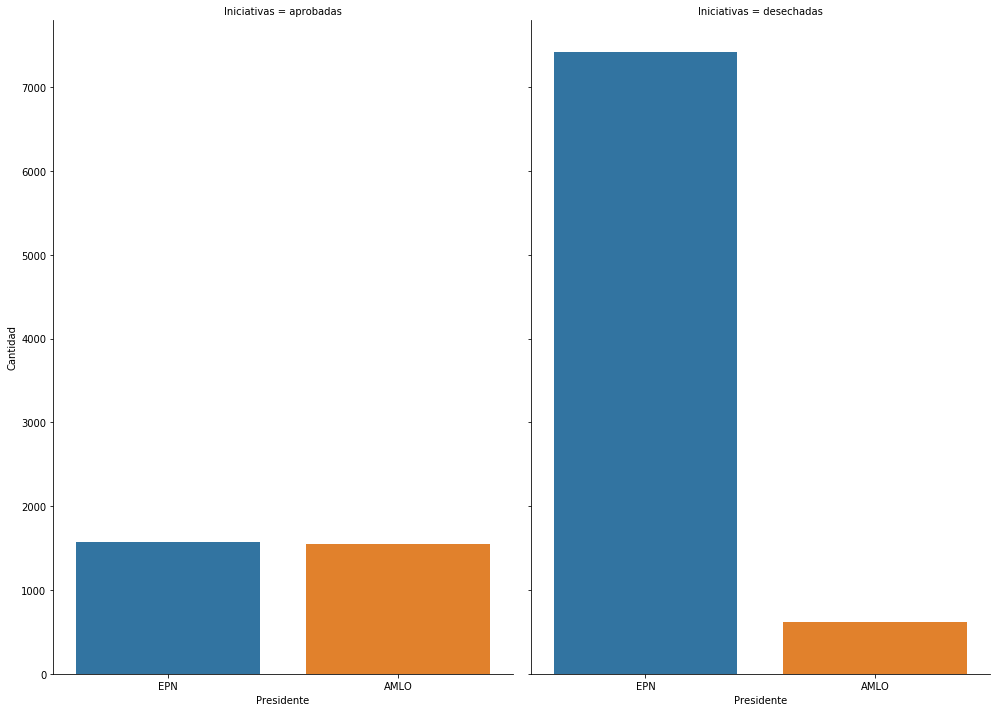

In [43]:
ax = sns.catplot(x="Presidente",y="Cantidad",\
                 col="Iniciativas",data=df_ini_apro_des, kind="bar",\
                 height=10, aspect=.7)
ax.savefig('./images/epn_amlo_comp.png')
ax

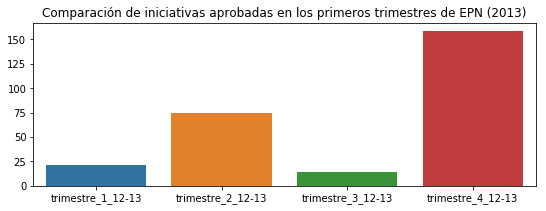

In [44]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_EPN_2013)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2013)")
bx.figure.savefig('./images/2012_2013_trim.png')
bx

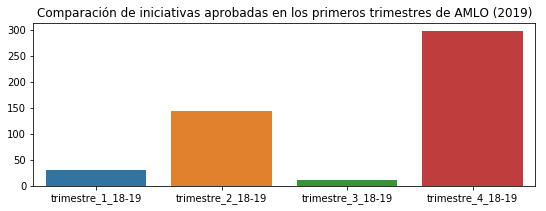

In [45]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_AMLO_2019)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2019)")
bx.figure.savefig('./images/2018_2019_trim.png')
bx

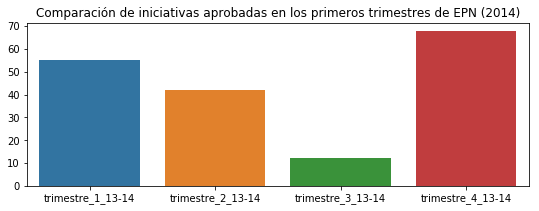

In [46]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_EPN_2014)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2014)")
bx.figure.savefig('./images/2013_2014_trim.png')
bx

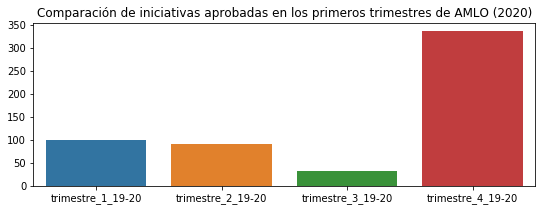

In [47]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_AMLO_2020)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2020)")
bx.figure.savefig('./images/2019_2020_trim.png')
bx

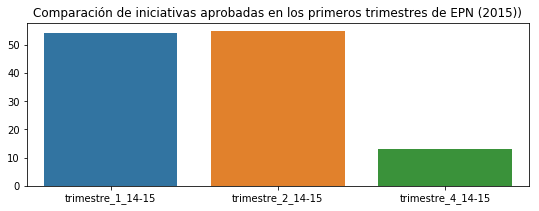

In [48]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_EPN_2015)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2015))")
bx.figure.savefig('./images/2014_2015_trim.png')
bx

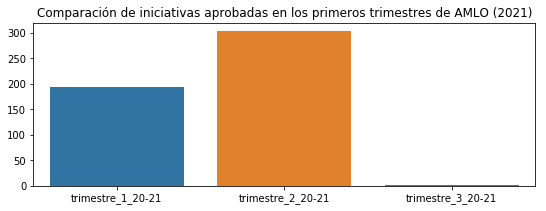

In [49]:
#Cambio de tamaño
fig = plt.subplots(figsize = (9, 3))

bx = sns.barplot(data=data_frame_trimestres_AMLO_2021)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2021)")
bx.figure.savefig('./images/2020_2021_trim.png')
bx

> Solo existe 1 registro el trimestre_3_20-21

# NOTA

Las iniciativas aprobadas por los partidos, en ocasiones, son parte de coalisiones. Por lo que, puede que esten repetidas para cada partido que es parte de la coalisión.

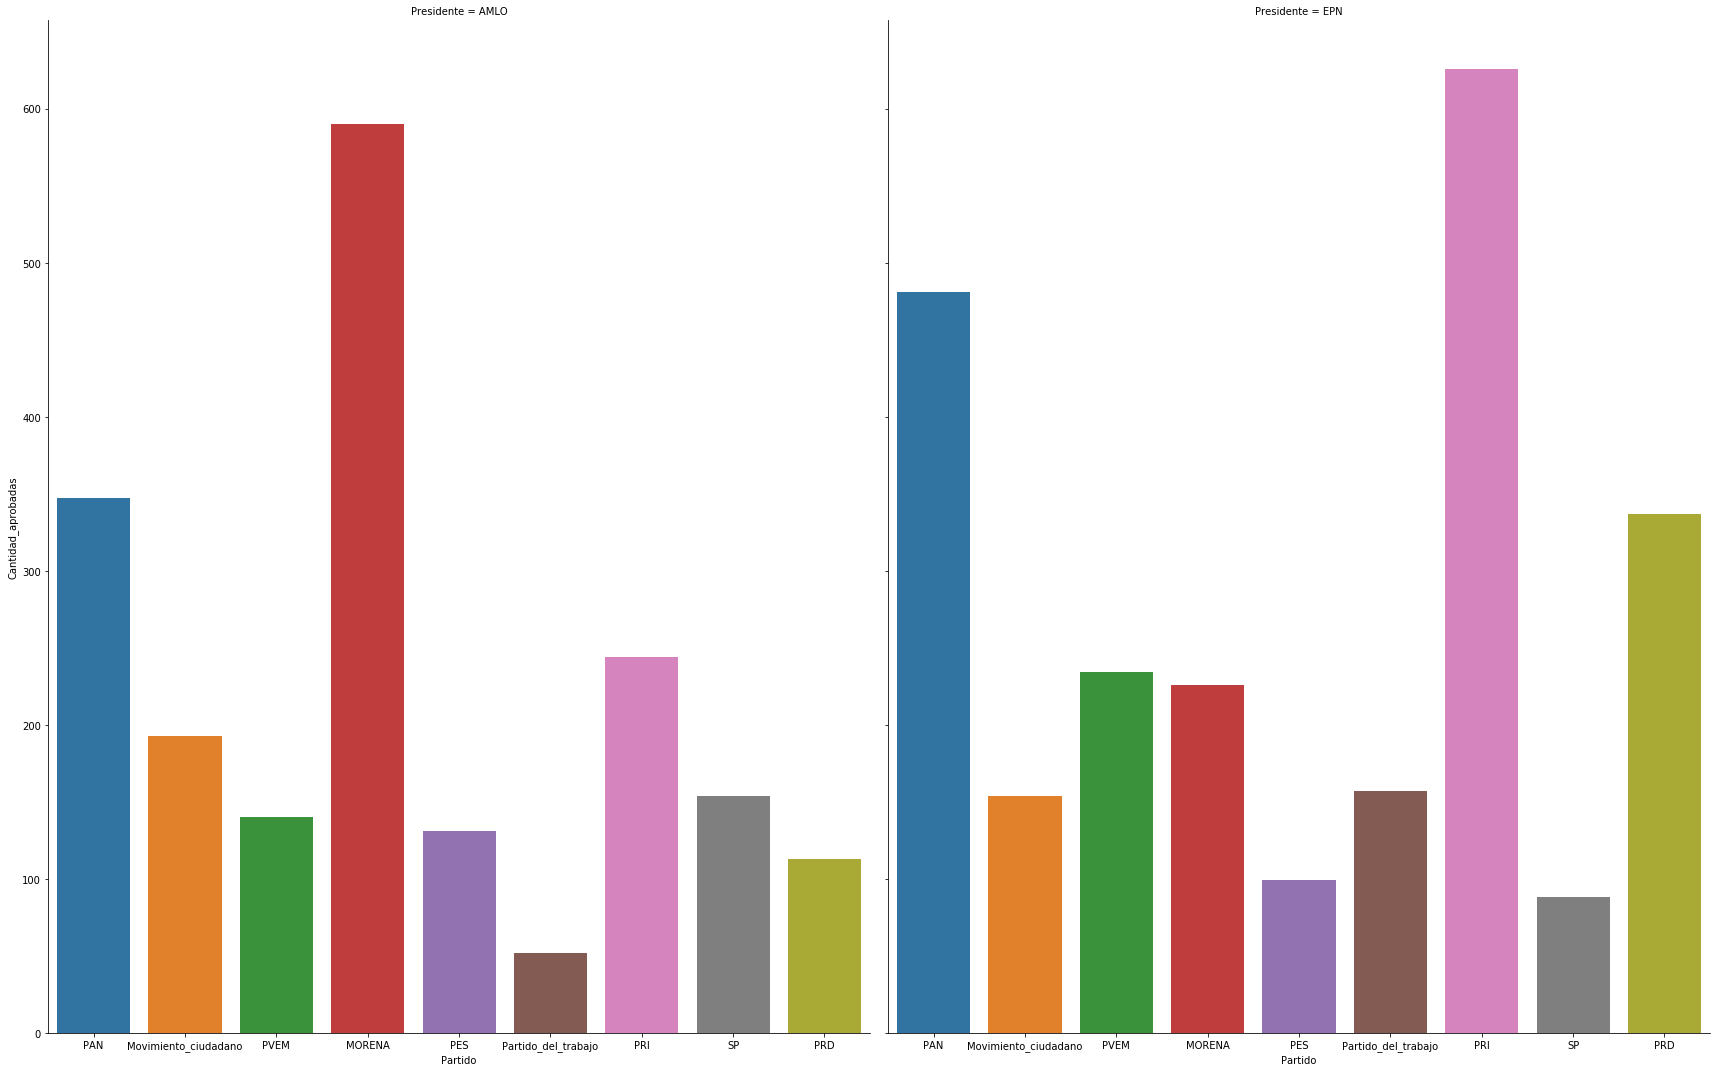

In [50]:
bx = sns.catplot(x="Partido",y="Cantidad_aprobadas",\
                 col="Presidente",data=df_ini_par_EPN_AMLO, kind="bar",\
                 height=15, aspect=.8)
bx.savefig('./images/partido_epn_amlo_apro.png')
bx

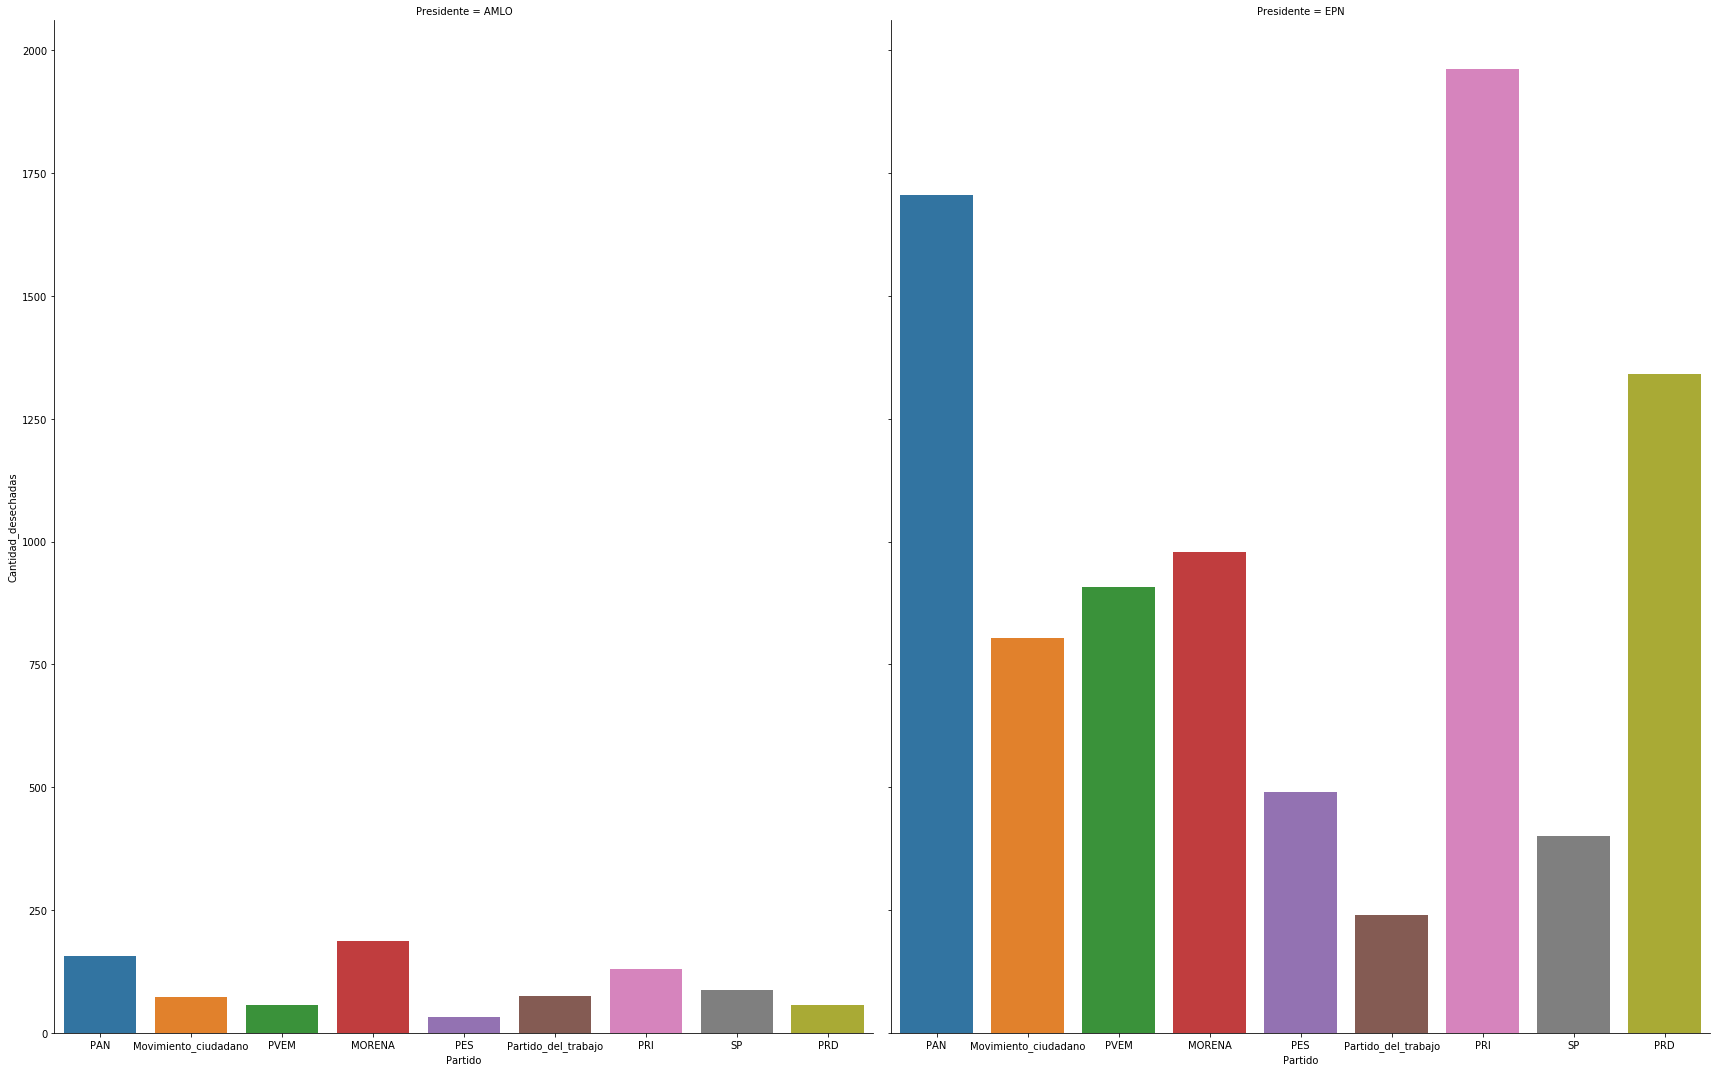

In [51]:
bx = sns.catplot(x="Partido",y="Cantidad_desechadas",\
                 col="Presidente",data=df_ini_par_EPN_AMLO_des, kind="bar",\
                 height=15, aspect=.8)
bx.savefig('./images/partido_epn_amlo_des.png')
bx

## Gráficas por ley que modifica en el sexenio de EPN/AMLO

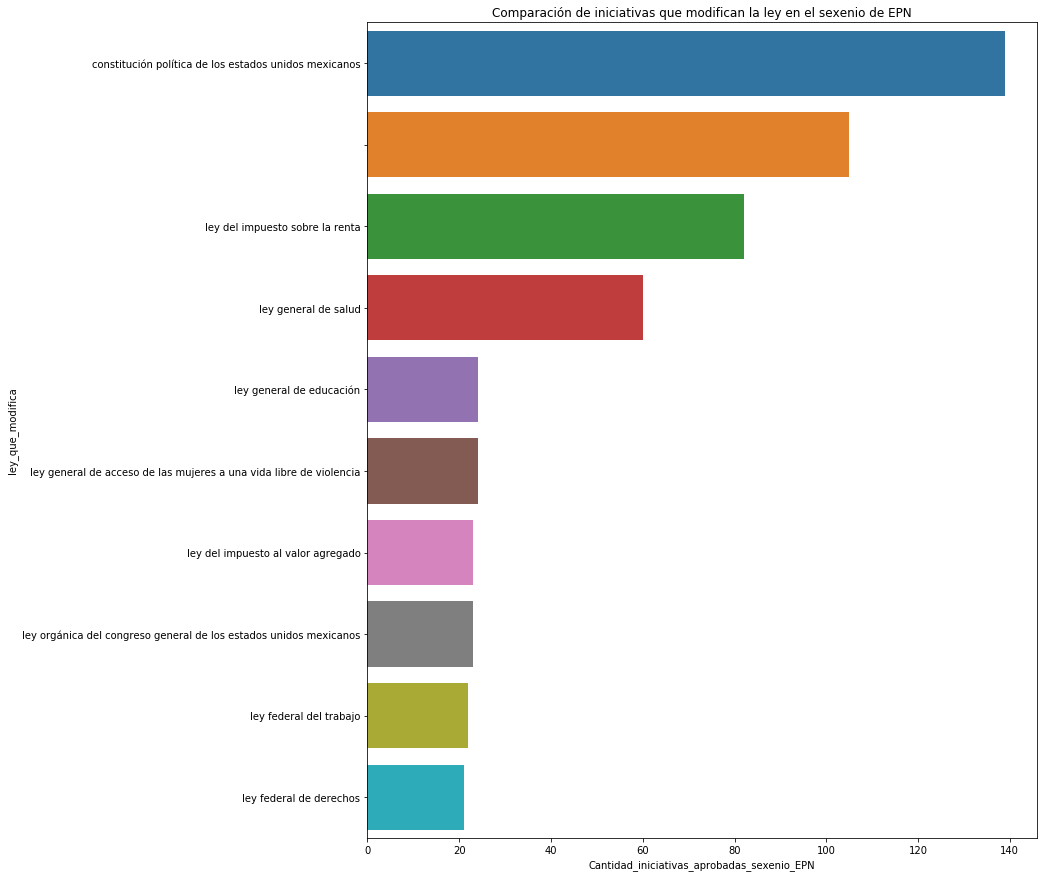

In [52]:
#Cambio de tamaño
fig = plt.subplots(figsize = (12, 15))

cx = sns.barplot(y="ley_que_modifica",x="Cantidad_iniciativas_aprobadas_sexenio_EPN",\
                 data=df_ley_modificada_EPN)
cx.set_title("Comparación de iniciativas que modifican la ley en el sexenio de EPN")
cx.figure.savefig('./images/leyes_epn.png')
cx

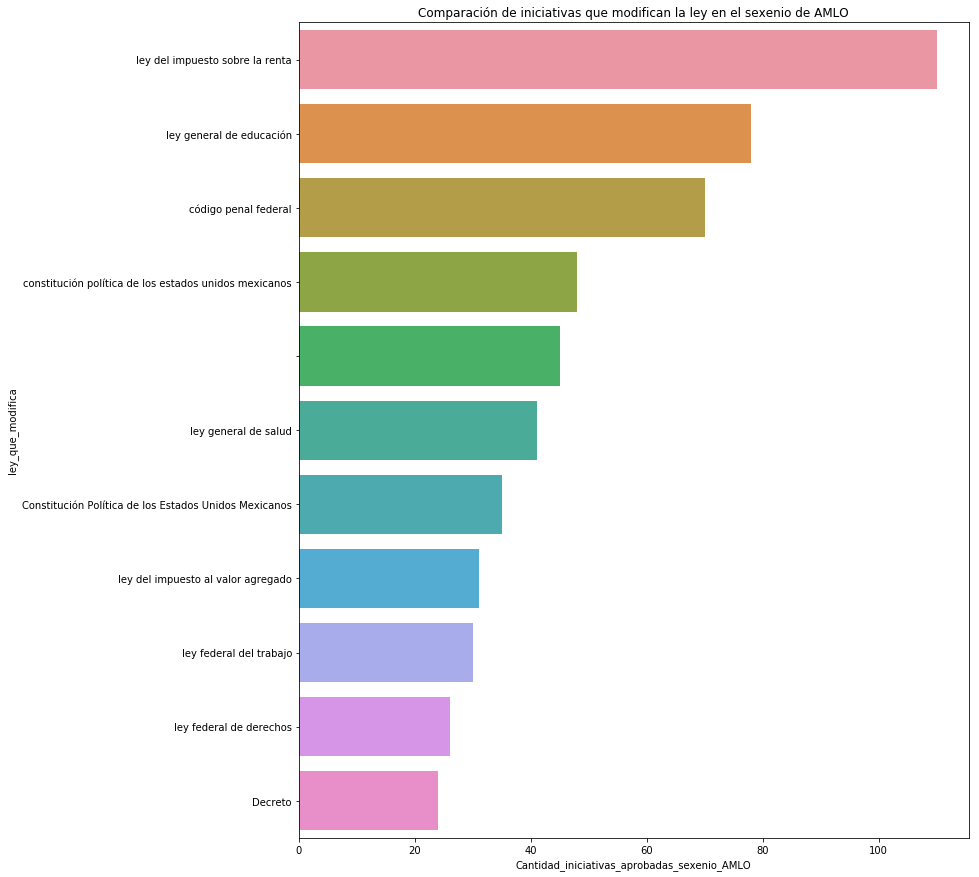

In [53]:
#Cambio de tamaño
fig = plt.subplots(figsize = (12, 15))

cx = sns.barplot(y="ley_que_modifica",x="Cantidad_iniciativas_aprobadas_sexenio_AMLO",\
                 data=df_ley_modificada_AMLO)
cx.set_title("Comparación de iniciativas que modifican la ley en el sexenio de AMLO")
cx.figure.savefig('./images/leyes_amlo.png')
cx

# Term Frequency / Inverse Document Frequency


# Combinaciones

  ## Pobreza
  [Pobreza, Desvíos, Recursos, Intermediarios, Vivienda, Salario, Alimentación, Extrema]

  Explicación: El tema de pobreza durante la campaña política de AMLO fue uno de los temas de mayor recurrencia en su discurso político. Por esa razón, consideramos importante analizar las iniciativas a través de palabras clave, que nos permitan conocer si las propuestas de AMLO están verdaderamente orientadas a dar soluciones a este tema. 

  ## Corrupción
  [Neoliberalismo, Impunidad, Engaño, Robo, Castigo, Narcotráfico, Drogas, Lavado, 4T, Pasado]

  Explicación: El tema de corrupción fue el estandarte en la campaña presidencial de AMLO. Cuando habla de la corrupción, está dispuesto a castigar a familiares y amigos. Lo cual nos pareció importante, porque, no había existido ningún presidente que estuviera dispuesto a castigar a los suyos.
    

## Librerias importadas

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from stop_words import get_stop_words

## Querys de consulta, para entrenar a nuestro TF/IDF

In [55]:
data_apro = mycollection.find()
lista_ini_apro = list(data_apro)
lista_ini_apro

[{'_id': ObjectId('61b0e200461ebbc0782ce5f0'),
  'id': 22653,
  'title': 'proyecto de decreto por el que se adicionan los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso de las mujeres a una vida libre de violencia.',
  'abstract': 'propone combatir la desigualdad, la marginación y la falta de oportunidades políticas de las mujeres, por ello, adiciona los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto polí

In [56]:
data_des = mycollection_2.find()
lista_ini_des = list(data_des)
lista_ini_des

[{'_id': ObjectId('61b0e247461ebbc0782cf223'),
  'id': 22657,
  'title': 'proyecto de decreto por el que se reforman el artículo 6 y la fracción i del artículo 65 de la ley general de educación.',
  'abstract': 'la presente iniciativa tiene el objetivo de reformar la ley general de educación, con la intención de establecer la completa gratuidad en la educación que imparta el estado, prohibiendo la solicitud de cualquier tipo de donativo en especie o económico a cambio de alguna contraprestación educativa.',
  'authors': 'maria de los angeles veronica gonzalez rodriguez',
  'date_anounced': 'Thu, 21 Apr 2016 00:00:00 GMT',
  'turno': 'Educación , Estudios Legislativos ',
  'laws_mod': 'Ley General de Educación, con la intención de establecer la completa gratuidad en la educación que imparta el Estado, prohibiendo la solicitud de cualquier tipo de donativo en especie o económico a cambio de alguna contraprestación educativa',
  'status': 'Desechada',
  'status_date': 'Thu, 08 Dec 2016 00

## Creación de data frames de las iniciativas

### Iniciativas aprobadas

In [57]:
df_ini_apro = pd.DataFrame(lista_ini_apro)
df_ini_apro.head(3)

_id  \
0  61b0e200461ebbc0782ce5f0   
1  61b0e200461ebbc0782ce5f1   
2  61b0e200461ebbc0782ce5f2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  abstract  \
0  propone combatir la desigualdad, la marginación y la falta de oportunidades políticas de las mujeres, por ello, adiciona los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto político o laboral. señala que los partidos políticos, deberán diseñar programas, con perspectiva de género, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminación, asegurando que sus órga...   
1  propone reformar diversas disposiciones de la ley general de instituciones y procedimientos electorales para promover la igualdad entre mujeres y hombres, la no discriminación y la eliminación de estereotipos y prácticas que desvaloricen a las personas por origen étnico, el género, la edad, las discapacidades, la condición social, las condiciones de salud, la religión, las opiniones, las preferencias sexuales, el estado civil o cualquier otra que atente contra la dignidad humana y tenga por objeto anular o menoscabar los derechos y libertades de las personas. establece que el ejercicio de los derechos y el cumplimento de las obligaciones de la ciudadanía en el ámbito político electoral, se regirán por el principio de la no violencia. los partidos políticos deben observar en todo momento la distribución equitativa de los tiempos de radio y televisión para todas las precampañas y campañas en forma paritaria.   mandata que en los procesos de precampaña y campaña se abstengan de realiz...   
2  la iniciativa tiene como objetivo permitir la siembra, cosecha, cultivo, preparación, acondicionamiento, adquisición, posesión, comercio, transporte, prescripción médica, suministro, empleo, uso, consumo y, en general, todo acto relacionado con la cannabis sativa, índica y americana o marihuana, o su resina, exclusivamente con fines científicos y médicos, a fin de poner a disposición de los pacientes que lo requieran, los medicamentos que se obtengan de dichas sustancias, siempre que se cumpla con lo dispuesto en la ley, los reglamentos, normas oficiales mexicanas, acuerdos administrativos del consejo de salubridad general y de la secretaría de salud, los protocolos, y demás disposiciones jurídicas aplicables. asimismo, con esta propuesta se suprime la prohibición contenida en la ley general de salud, para la siembra, cosecha, cultivo, elaboración, preparación, acon

### Iniciativas desechadas

In [58]:
df_ini_des = pd.DataFrame(lista_ini_des)
df_ini_des.head(3)

_id  \
0  61b0e247461ebbc0782cf223   
1  61b0e247461ebbc0782cf224   
2  61b0e247461ebbc0782cf225   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            abstract  \
0                                                                                                                                                                                                                                                                                                                                                                                                                         la presente iniciativa tiene el objetivo de reformar la ley general de educación, con la intención de establecer la completa gratuidad en la educación que imparta el estado, prohibiendo la solicitud de cualquier tipo de donativo en especie o económico a cambio de alguna contraprestación educativa.   
1                                                                                                                                                                                                                                                                                                                                                                                                                 propone reformar el artículo 2 de la ley federal de telecomunicaciones y radiodifusión para garantizar una estrategia permanente sustentada en una perspectiva de derechos para que los hogares puedan acceder a la información que se transmite con eficiencia, calidad y, sobre todo, bajo la tutela del estado.   
2  la ley que se pretende expedir tiene por objeto regular el uso, aprovechamiento y operación de las aeronaves y sistemas pilotadas a distancia (rpas) para garantizar la seguridad operacional de todos los demás usuarios del espacio aéreo así como la seguridad de las personas y bienes en el territorio mexicano. la ley contempla las generalidades para todas las clasificaciones y tipos de rpas, las restricciones generales, régimen de rpas conforme su clasificación y uso, contempla lo relacionado a la autorización de operación de vuelo, registro, matriculación y tripulación, registro y aprobación, lo relacionado a la autoridad aeronáutica, diseño y producción de rpas, responsabilidad civil y sanciones.   

                                            authors  \
0  maria de los angeles veronica gonzalez rodriguez   
1  maria de los angeles veronica gonzalez rodriguez   
2                             dolores padierna luna   

                   date_anounced  \
0  Thu, 21 Apr 2016 00:00:00 GMT   
1  Tue, 26 Apr 2016 00:00:00 GMT   
2  Tue, 26 Apr 2016 00:00:00 GMT   

                                                    document_link  \
0  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62168   
1  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62443   
2  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62268   

                                                     document_pdf     id  \
0  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62168  22657   
1  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62443  22659   
2  https://www.senado.gob.mx/64/gaceta_del_senado/documento/62268  22664   

                                                                                                      

### Data frame general de las iniciativas

In [59]:
df_iniciativas = pd.concat([df_ini_apro,df_ini_des],axis=0)
df_iniciativas.head()

_id  \
0  61b0e200461ebbc0782ce5f0   
1  61b0e200461ebbc0782ce5f1   
2  61b0e200461ebbc0782ce5f2   
3  61b0e200461ebbc0782ce5f3   
4  61b0e200461ebbc0782ce5f4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  abstract  \
0  propone combatir la desigualdad, la marginación y la falta de oportunidades políticas de las mujeres, por ello, adiciona los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto político o laboral. señala que los partidos políticos, deberán diseñar programas, con perspectiva de género, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminación, asegurando que sus órga...   
1  propone reformar diversas disposiciones de la ley general de instituciones y procedimientos electorales para promover la igualdad entre mujeres y hombres, la no discriminación y la eliminación de estereotipos y prácticas que desvaloricen a las personas por origen étnico, el género, la edad, las discapacidades, la condición social, las condiciones de salud, la religión, las opiniones, las preferencias sexuales, el estado civil o cualquier otra que atente contra la dignidad humana y tenga por objeto anular o menoscabar los derechos y libertades de las personas. establece que el ejercicio de los derechos y el cumplimento de las obligaciones de la ciudadanía en el ámbito político electoral, se regirán por el principio de la no violencia. los partidos políticos deben observar en todo momento la distribución equitativa de los tiempos de radio y televisión para todas las precampañas y campañas en forma paritaria.   mandata que en los procesos de precampaña y campaña se abstengan de realiz...   
2  la iniciativa tiene como objetivo permitir la siembra, cosecha, cultivo, preparación, acondicionamiento, adquisición, posesión, comercio, transporte, prescripción médica, suministro, empleo, uso, consumo y, en general, todo acto relacionado con la cannabis sativa, índica y americana o marihuana, o su resina, exclusivamente con fines científicos y médicos, a fin de poner a disposición de los pacientes que lo requieran, los medicamentos que se obtengan de dichas sustancias, siempre que se cumpla con lo dispuesto en la ley, los reglamentos, normas oficiales mexicanas, acuerdos administrativos del consejo de salubridad general y de la secretaría de salud, los protocolos, y demás disposiciones jurídicas aplicables. asimismo, con esta propuesta se suprime la prohibición contenida en la ley general de salud, par

### Vamos a eliminar la columna _id

In [60]:
df_iniciativas.drop(columns='_id',inplace=True)
df_iniciativas.head(10)

abstract  \
0  propone combatir la desigualdad, la marginación y la falta de oportunidades políticas de las mujeres, por ello, adiciona los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto político o laboral. señala que los partidos políticos, deberán diseñar programas, con perspectiva de género, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminación, asegurando que sus órga...   
1  propone reformar diversas disposiciones de la ley general de instituciones y procedimientos electorales para promover la igualdad entre mujeres y hombres, la no discriminación y la eliminación de estereotipos y prácticas que desvaloricen a las personas por origen étnico, el género, la edad, las discapacidades, la condición social, las condiciones de salud, la religión, las opiniones, las preferencias sexuales, el estado civil o cualquier otra que atente contra la dignidad humana y tenga por objeto anular o menoscabar los derechos y libertades de las personas. establece que el ejercicio de los derechos y el cumplimento de las obligaciones de la ciudadanía en el ámbito político electoral, se regirán por el principio de la no violencia. los partidos políticos deben observar en todo momento la distribución equitativa de los tiempos de radio y televisión para todas las precampañas y campañas en forma paritaria.   mandata que en los procesos de precampaña y campaña se abstengan de realiz...   
2  la iniciativa tiene como objetivo permitir la siembra, cosecha, cultivo, preparación, acondicionamiento, adquisición, posesión, comercio, transporte, prescripción médica, suministro, empleo, uso, consumo y, en general, todo acto relacionado con la cannabis sativa, índica y americana o marihuana, o su resina, exclusivamente con fines científicos y médicos, a fin de poner a disposición de los pacientes que lo requieran, los medicamentos que se obtengan de dichas sustancias, siempre que se cumpla con lo dispuesto en la ley, los reglamentos, normas oficiales mexicanas, acuerdos administrativos del consejo de salubridad general y de la secretaría de salud, los protocolos, y demás disposiciones jurídicas aplicables. asimismo, con esta propuesta se suprime la prohibición contenida en la ley general de salud, para la siembra, cosecha, cultivo, elaboración, preparación, acondicionamiento, adquisición, posesión, comercio, transporte, prescripción médica, suministro, empleo, uso, consumo y en...   
3  la ley que se propone expedir tiene por objeto fomentar el desarrollo de la gastronomía mexicana, como sector fundamental para el crecimiento económico y el empleo, fortalecer los elementos esenciales de la economía mexicana a través de la aplicación de la política nacional de fomento a la gastronomía mexicana; contribuir a una alimentación adecuada: nutritiva, suficiente y de calidad, que coadyuve a la salud y bienestar de la población mexicana; promover la productividad de las micro, pequeñas y medianas empresas relacionadas con la gastronomía mexicana; incentivar y fortalecer la inversión nacional en las regiones gastronómicas del país; implementar mecanismos de colaboración para el acceso a programas económicos, sociales, turísticos y culturales en materia de gastronomía; promover integralmente la gastronomía mexicana como elemento cultural de posicionamiento internacional, plataforma de productos nacionales y activo turístico, e identificar las nec

### Obtenemos la información del abstract 

In [61]:
abstract = df_iniciativas['abstract']
abstract.head().values

array(['propone combatir la desigualdad, la marginación y la falta de oportunidades políticas de las mujeres, por ello, adiciona los artículos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerará como violencia política todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por sí o a través de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algún cargo público, así como todas aquellas modalidades que busquen ejercer presión, acoso o intimidación encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto político o laboral. señala que los partidos políticos, deberán diseñar programas, con perspectiva de género, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminación, asegurando que sus 

### Función para normalizar las palabras dentro del abstract

In [62]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [63]:
lista_abstract = []

for i in abstract:
    var = normalize(i)
    lista_abstract.append(var)
lista_abstract

['propone combatir la desigualdad, la marginacion y la falta de oportunidades politicas de las mujeres, por ello, adiciona los articulos 20 bis, 20 ter, 20 quater y 20 quintus de la ley general de acceso a las mujeres a una vida libre de violencia, para establecer que se considerara como violencia politica todos aquellos actos, omisiones y conductas agresivas o discriminatorias, cometidos por si o a traves de terceros, realizados en contra de mujeres candidatas, elegidos por la sociedad o designadas para desempeñar algun cargo publico, asi como todas aquellas modalidades que busquen ejercer presion, acoso o intimidacion encaminadas a inducir en contra de su voluntad la toma de decisiones o a provocar que abandonen su proyecto politico o laboral. señala que los partidos politicos, deberan diseñar programas, con perspectiva de genero, al interior de su militancia, encaminadas al empoderamiento de las mujeres, previniendo toda forma de violencia y discriminacion, asegurando que sus organo

### Importamos stop words en español para el análisis

In [64]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('spanish')
NLTK_stop_words_spanish = []

for i in NLTK_stop_words_list:
    var = normalize(i)
    NLTK_stop_words_spanish.append(var)

[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preparamos al tf_idf para el entrenamiento

In [65]:
tf_idf = TfidfVectorizer(lowercase=True, analyzer="word", stop_words=NLTK_stop_words_spanish, use_idf=True)

### Lo entrenamos y creamos la matriz TDM

In [66]:
tfidf_m = tf_idf.fit(lista_abstract)
dtm = tfidf_m.transform(lista_abstract)

### Obtenemos una muestra del vocabulario de nuestro tf/idf

In [67]:
tfidf_m = tfidf_m.vocabulary_
tfidf_m

{'propone': 13533,
 'combatir': 3413,
 'desigualdad': 5486,
 'marginacion': 10746,
 'falta': 7735,
 'oportunidades': 11923,
 'politicas': 12808,
 'mujeres': 11290,
 'ello': 6477,
 'adiciona': 832,
 'articulos': 1860,
 '20': 164,
 'bis': 2501,
 'ter': 16316,
 'quater': 13812,
 'quintus': 13862,
 'ley': 10336,
 'general': 8339,
 'acceso': 567,
 'vida': 17176,
 'libre': 10360,
 'violencia': 17242,
 'establecer': 7110,
 'considerara': 4079,
 'politica': 12806,
 'aquellos': 1736,
 'actos': 705,
 'omisiones': 11867,
 'conductas': 3880,
 'agresivas': 1108,
 'discriminatorias': 5927,
 'cometidos': 3470,
 'traves': 16713,
 'terceros': 16331,
 'realizados': 13974,
 'candidatas': 2748,
 'elegidos': 6443,
 'sociedad': 15652,
 'designadas': 5475,
 'desempeñar': 5434,
 'algun': 1243,
 'cargo': 2848,
 'publico': 13750,
 'asi': 1931,
 'todas': 16444,
 'aquellas': 1734,
 'modalidades': 11151,
 'busquen': 2600,
 'ejercer': 6361,
 'presion': 13144,
 'acoso': 651,
 'intimidacion': 9913,
 'encaminadas': 66

# Conexión al Data Lake de Azure

## Librerias importadas

In [68]:
import os, yaml
from azure.storage.blob import ContainerClient

## Definición de funciones para subir archivos al Data Lake de Azure

In [69]:
def read_yaml_file(yaml_file):
    """ load yaml cofigurations """

    config = None
    try:
        with open(yaml_file, 'r') as f:
            config = yaml.safe_load(f)
    except:
        raise FileNotFoundError('Couldnt load the file')

    return config

def get_files(dir):
    with os.scandir(dir) as entries:
        for entry in entries:
            if entry.is_file() and not entry.name.startswith('.'):
                yield entry
                
def upload(files, connection_string, container_name):
    container_client = ContainerClient.from_connection_string(connection_string, container_name)
    print("Uploading files to blob storage... ")
    
    for file in files:
        blob_client = container_client.get_blob_client(file.name)
        with open(file.path,'rb') as data:
            blob_client.upload_blob(data)
            print (f'{file.name} uploaded to blob storage')
            os.remove(file)
            print (f'{file.name} removed from')

In [70]:
"""Ejemplo de subida
config = read_yaml_file('./conf/local/config.yaml')
data = get_files(config["source_folder"])
upload(data,config["azure_storage_connectionstring"],config["propuestas_container_name"] )
"""

'Ejemplo de subida\nconfig = read_yaml_file(\'./conf/local/config.yaml\')\ndata = get_files(config["source_folder"])\nupload(data,config["azure_storage_connectionstring"],config["propuestas_container_name"] )\n'

## Definición de función para obtener una iniciativa de cierto ID

In [71]:
def iniciativa_id(id_ini):
    client = MongoClient()
    client = MongoClient(client_cred) 
    client.drop_database("consul_propuesta")
    
    with open('/home/bruno/Documentos/Bases_no_relacionales/conf/token_api.txt') as f:
        var = f.read()
        authorization = var

    payload={}
    headers = {
        'Authorization': authorization
    }
    
    url = "https://api.apilegislativo.com/iniciativa/" + str(id_ini) + '/'
    response = requests.request("GET", url, headers=headers, data=payload)
    
    myclient = pymongo.MongoClient(client_cred) 
    mydb = myclient["consul_propuesta"] 
    mycol = mydb["consulta_iniciativa"] 
    iniciativas = response.json()
    x = mycol.insert_one(iniciativas)
    
    consul_inici = mycol.find()
    for i in consul_inici:
        iniciativa = i
    abstract_ini = normalize(iniciativa['abstract'])
    return [abstract_ini]

In [72]:
def id_propuesta_ley(id_iniciativa):
    today = date.today()
    q = iniciativa_id(id_iniciativa)
    top = 5
    
    cv = CountVectorizer(lowercase=True, stop_words=NLTK_stop_words_spanish)
    q_tokens = cv.fit(q)
    tokens = q_tokens.get_feature_names()
    print("Tokens del query:\n", tokens)
    
    columns = {}
    for element in tokens:
        columns[element] = tfidf_m[element]
    
    # filtramos solo los términos que existen en nuestra DTM
    dtm_q = dtm[:,list(columns.values())].todense()
    # convertimos a DF para que la manipulación sea más sencilla
    tdm_df = pd.DataFrame(dtm_q)
    # sumamos td-idf de todos los documentos en la TDM para los tokens en el query
    tdidf_by_doc = tdm_df.apply(lambda x: x.sum(), axis=1)
    # top n de relevancia, por default 5
    top_n_relevance = tdidf_by_doc.sort_values(ascending=False).head(top)
    
    lista_ind = []
    array_aux = top_n_relevance.index.values  
    to_df = []

    for i in array_aux:
        to_df += [{"abstract":df_iniciativas.iloc[i,0]}]
    
    df_ini_con = pd.DataFrame(to_df,index=array_aux)
    
    data = open("./data/consulta_tfidf_"+ str(id_iniciativa) + "_" + str(today) + ".txt","w")
    L = [str(df_ini_con)]
    data.writelines(L)
    data.write('\n')
    S = [str(top_n_relevance)]
    data.writelines(S)
    data.close()
    
    config = read_yaml_file('./conf/local/config.yaml')
    data = get_files(config["source_folder"])
    upload(data,config["azure_storage_connectionstring"],config["propuestas_container_name"] )

    return  {'abstract':[df_ini_con],'relevancia':[top_n_relevance]}

In [73]:
#id_propuesta_ley(8)

In [74]:
def id_propuesta_ley(lista):
    today = dtt.now()
    q = lista
    id_iniciativa = 8
    top = 15
    
    cv = CountVectorizer(lowercase=True, stop_words=NLTK_stop_words_spanish)
    q_tokens = cv.fit(q)
    tokens = q_tokens.get_feature_names()
    print("Tokens del query:\n", tokens)
    
    columns = {}
    for element in tokens:
        columns[element] = tfidf_m[element]
    
    # filtramos solo los términos que existen en nuestra DTM
    dtm_q = dtm[:,list(columns.values())].todense()
    # convertimos a DF para que la manipulación sea más sencilla
    tdm_df = pd.DataFrame(dtm_q)
    # sumamos td-idf de todos los documentos en la TDM para los tokens en el query
    tdidf_by_doc = tdm_df.apply(lambda x: x.sum(), axis=1)
    # top n de relevancia, por default 5
    top_n_relevance = tdidf_by_doc.sort_values(ascending=False).head(top)
    
    lista_ind = []
    array_aux = top_n_relevance.index.values  
    to_df = []

    for i in array_aux:
        to_df += [{"abstract":df_iniciativas.iloc[i,[0,5]]}]
    
    df_ini_con = pd.DataFrame(to_df,index=array_aux)
    
    data = open("./data/consulta_tfidf_"+ str(id_iniciativa) + "_" + str(today) + ".txt","w")
    L = [str(df_ini_con)]
    data.writelines(L)
    data.write('\n')
    S = [str(top_n_relevance)]
    data.writelines(S)
    data.close()
    
    config = read_yaml_file('./conf/local/config.yaml')
    data = get_files(config["source_folder"])
    upload(data,config["azure_storage_connectionstring"],config["propuestas_container_name"] )

    return  {'abstract':[df_ini_con],'relevancia':[top_n_relevance]}

In [75]:
id_propuesta_ley(['desarrollo estimulo otorgar impuestos deducir salario pago deducibilidad eliminar renta pagos rural incentivo media'])

Tokens del query:
 ['deducibilidad', 'deducir', 'desarrollo', 'eliminar', 'estimulo', 'impuestos', 'incentivo', 'media', 'otorgar', 'pago', 'pagos', 'renta', 'rural', 'salario']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:53.235782.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:53.235782.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    abstract
  2734                                                                                                       

In [76]:
id_propuesta_ley(['educacion eliminar establecer promover garantizar escolar protocolos estudio capacitar profesores genero'])

Tokens del query:
 ['capacitar', 'educacion', 'eliminar', 'escolar', 'establecer', 'estudio', 'garantizar', 'genero', 'profesores', 'promover', 'protocolos']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:54.947325.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:54.947325.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [77]:
id_propuesta_ley(['tipificar delito pena multa sexual mujer maltrato animal extorsion robo eliminar aumentar incrementar genero menores edad violacion'])

Tokens del query:
 ['animal', 'aumentar', 'delito', 'edad', 'eliminar', 'extorsion', 'genero', 'incrementar', 'maltrato', 'menores', 'mujer', 'multa', 'pena', 'robo', 'sexual', 'tipificar', 'violacion']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:56.103464.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:56.103464.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           abstract
  2607                                                                                                                                                                                                                                                                                                                                                                                                

In [78]:
id_propuesta_ley(['estimulo laboral deducir igualdad discriminacion mujer genero perspectiva establecer reducir impuesto renta prestaciones deducibilidad aportaciones deducibles deduccion ingreso ingresos politica deducciones educacion'])

Tokens del query:
 ['aportaciones', 'deduccion', 'deducciones', 'deducibilidad', 'deducibles', 'deducir', 'discriminacion', 'educacion', 'establecer', 'estimulo', 'genero', 'igualdad', 'impuesto', 'ingreso', 'ingresos', 'laboral', 'mujer', 'perspectiva', 'politica', 'prestaciones', 'reducir', 'renta']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:57.225075.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:57.225075.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [79]:
id_propuesta_ley(['violencia genero perspectiva igualdad discriminacion reducir aumentar delito mujer mujeres proteccion social sexo violacion violaciones sexista niñas'])

Tokens del query:
 ['aumentar', 'delito', 'discriminacion', 'genero', 'igualdad', 'mujer', 'mujeres', 'niñas', 'perspectiva', 'proteccion', 'reducir', 'sexista', 'sexo', 'social', 'violacion', 'violaciones', 'violencia']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:58.635160.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:58.635160.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [80]:
id_propuesta_ley(['delito pena multa extorsion robo aumentar incrementar violacion desacato'])

Tokens del query:
 ['aumentar', 'delito', 'desacato', 'extorsion', 'incrementar', 'multa', 'pena', 'robo', 'violacion']
Uploading files to blob storage... 
consulta_tfidf_8_2021-12-09 14:37:59.779321.txt uploaded to blob storage
consulta_tfidf_8_2021-12-09 14:37:59.779321.txt removed from


{'abstract': [                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          abstract
  2475                                                                                                                                                                                                                                                                                                                                                 

In [81]:
df_iniciativas.iloc[5661]

abstract             garantizar el derecho a la seguridad social de los trabajadores estacionales del campo. distinguir entre trabajador estacional y eventual del campo, y diferenciar estos con los trabajadores eventuales de las zonas urbanas. establecer un registro del trabajador estacional del campo, a fin de garantizar su protección desde el inicio de sus labores. procurar la atención médica durante todo el año a los trabajadores del campo a pesar de haber laborado de forma intermitente durante el mismo. garantizar el cumplimiento del pago de las cuotas obrero-patronales, en la justa proporción que requiere una actividad intermitente como la que realizan los trabajadores estacionales del campo. establecer la corresponsabilidad del estado y los patrones en el otorgamiento material y humano de la seguridad social en aquellos lugares en que el imss no pueda garantizar una inversión permanente ante una demanda volátil. estatuir una retribución justa por concepto de reversión del costo i

In [82]:
df_iniciativas.iloc[1073,[0,5]]

abstract    otorgar un estímulo fiscal a los contribuyentes del impuesto sobre la renta que cuenten con la certificación en igualdad laboral y no discriminación.
id                                                                                                                                                          17911
Name: 1073, dtype: object

In [83]:
agg_result_iniciativas_EPN= mycollection.aggregate([
                {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
                {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"laws_mod":"ley general de educación"}]}},
                {"$limit":int(10)}
            ])
j=1
for i in agg_result_iniciativas_EPN:
    print(i,j)
    j += 1

{'_id': ObjectId('61b0e200461ebbc0782ce63a'), 'id': 22790, 'title': 'proyecto de decreto por el que se reforman y adicionan diversas disposiciones de la ley general de educación.', 'abstract': 'propone facultar a la secretaría de educación pública a determinar, mediante normas y criterios generales, los casos en que los estudios realizados fuera del sistema educativo nacional, pueden adquirir validez oficial. por ello, como complemento a lo anterior, se requiere facilitar el ingreso a la educación superior de quienes regresen al país en las condiciones descritas, para lo cual se propone aprovechar la experiencia y conocimientos de los cuerpos académicos de las instituciones particulares de educación superior, autorizándolas para que otorguen revalidaciones parciales de estudios de licenciatura.', 'authors': '', 'date_anounced': 'Thu, 02 Feb 2017 00:00:00 GMT', 'turno': 'Educación , Estudios Legislativos ', 'laws_mod': 'ley general de educación', 'status': 'Aprobada', 'status_date': dat

In [84]:
def obtener_datos(tipo,ley,sexenio,cant):

    #mycollection,mycollection_2 = creds()
    
    if tipo == 'aprobadas':
        
        if sexenio == 'epn':
            agg_result_iniciativas= mycollection.aggregate([
                {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
                {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"laws_mod":ley}]}},
                {"$limit":int(cant)}
            ])
        elif sexenio == 'amlo':
            agg_result_iniciativas= mycollection.aggregate([
                {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
                {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"laws_mod":ley}]}},
                {"$limit":int(cant)}
            ])
        else:
            agg_result_iniciativas= mycollection.aggregate([
                {"$match":{"laws_mod":ley}},
                {"$limit":int(cant)}
            ])

    else:

        if sexenio == 'epn':
            agg_result_iniciativas= mycollection_2.aggregate([
                {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
                {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"laws_mod":ley}]}},
                {"$limit":int(cant)}
            ])
        elif sexenio == 'amlo':
            agg_result_iniciativas= mycollection_2.aggregate([
                {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
                {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"laws_mod":ley}]}},
                {"$limit":int(cant)}
            ])
        else:
            agg_result_iniciativas= mycollection_2.aggregate([
                {"$match":{"laws_mod":ley}},
                {"$limit":int(cant)}
            ])

    lista = []
    for i in agg_result_iniciativas:
        lista.append(i)
    return lista

In [86]:
obtener_datos('aprobadas','','epn','100')

[{'_id': ObjectId('61b0e200461ebbc0782ce5fc'),
  'id': 22671,
  'title': 'proyecto de decreto por el que se declara el día nacional contra el consumo problemático de bebidas alcohólicas.',
  'abstract': 'propone que el honorable congreso de la unión declare el 14 de noviembre como “día nacional contra el consumo problemático de bebidas alcohólicas”. en dicho día, las instituciones públicas, prestadoras de servicios de salud, instituciones educativas y privadas, organizaciones de la sociedad civil y empresas afines a la temática, llevarán a cabo acciones tendientes a promover la reflexión y la concientización de la ciudadanía sobre el problema que representa el consumo problemático de bebidas alcohólicas. señala que las autoridades buscaran la colaboración de medios de comunicación para la difusión masiva de actividades, así como para la inclusión de contenidos y propuestas sobre el tema.',
  'authors': 'maria de los angeles veronica gonzalez rodriguez',
  'date_anounced': 'Thu, 28 Apr 